In [ ]:
import pandas as pd
movies= pd.read_csv(r'C:\Users\Admin\Desktop\My Portfolio\imdb_movies.csv')
movies

In [13]:
pd.set_option('display.max.rows',11000)
pd.set_option('display.max.columns',22)
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
movies[movies.duplicated]
movies.drop_duplicates(inplace=True)

In [21]:
movies.dropna(subset=['genres'],inplace=True)

In [23]:
movies['profit']=movies['revenue']-movies['budget']

In [25]:
movies_genre= movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [35]:
from pandas import Series,DataFrame
split=movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index=split.index.droplevel(-1)
split.name='genre_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)
movies_genre

C:\Users\Admin\AppData\Local\Temp\ipykernel_3888\1291078399.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split=movies_genre['genres'].str.split('|').apply(Series,1).stack()


,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genre_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


In [ ]:
## Research Questions
1.Which genre is the most common(number of movies made)?


In [65]:
genres_count=pd.DataFrame(movies_genre.groupby('genre_split').original_title.nunique()).sort_values('original_title',ascending=False)

<Axes: title={'center': 'Movies per genre in'}, ylabel='original_title'>

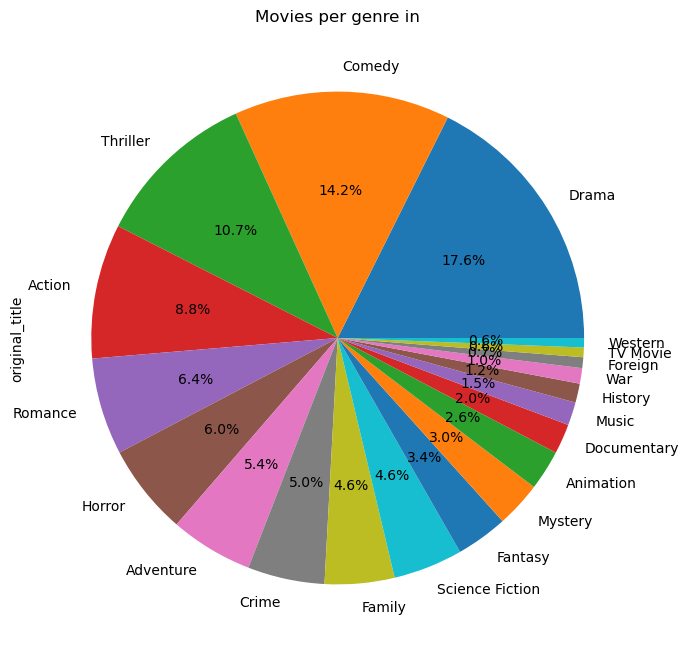

In [57]:
genres_count['original_title'].plot.pie(title='Movies per genre in',autopct='%1.1f%%',figsize=(8,8))

<Axes: title={'center': 'Movies per genre in'}, ylabel='genre_split'>

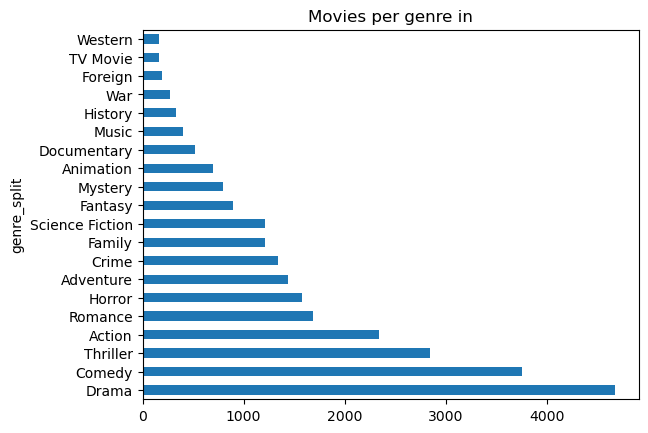

In [59]:
genres_count['original_title'].plot.barh(title='Movies per genre in')

In [ ]:
2.Which genre have high avg.budget and revenue?

In [85]:
genres_average =(movies_genre.groupby('genre_split').mean(numeric_only = True))
pd.options.display.float_format = '{.2f}'.format
genres_average

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genre_split,,,,,,,
Action,0.926274,2.772782e+07,7.279473e+07,104.917785,392.993708,5.787752,4.506691e+07
Adventure,1.154259,3.754369e+07,1.131379e+08,106.173351,513.125085,5.940585,7.559417e+07
Animation,0.852182,2.315978e+07,7.525606e+07,68.181688,303.000000,6.403147,5.209628e+07
Comedy,0.592607,1.329792e+07,3.752624e+07,96.745057,176.436330,5.905167,2.422833e+07
Crime,0.744930,1.766380e+07,4.236866e+07,106.917282,278.805022,6.124889,2.470486e+07
Documentary,0.181432,5.771491e+05,2.041107e+06,102.651923,35.105769,6.908462,1.463958e+06
Drama,0.591495,1.188072e+07,2.923226e+07,110.478151,182.544538,6.165546,1.735154e+07
Family,0.786668,2.335934e+07,7.243318e+07,89.603574,272.320877,5.997563,4.907384e+07
Fantasy,0.992840,3.261259e+07,9.631366e+07,100.736900,420.741266,5.863537,6.370107e+07


In [93]:
genres_average.sort_values('budget',ascending=True,inplace=True)

<Axes: title={'center': 'Budget and Revenue by genre'}, ylabel='genre_split'>

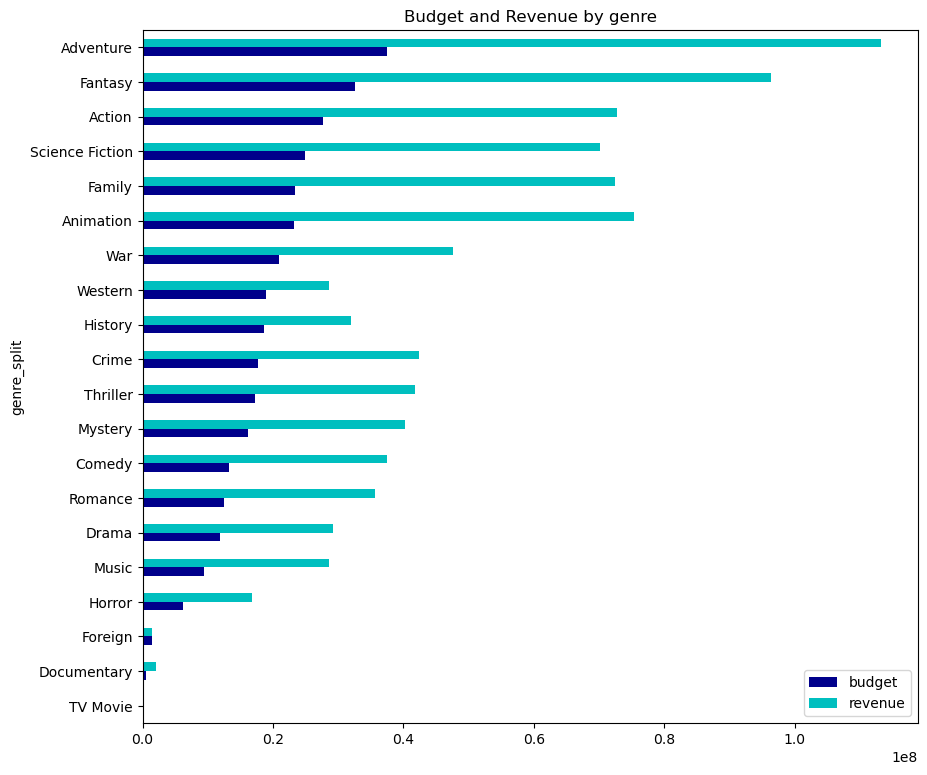

In [95]:
genres_average[['budget','revenue']].plot.barh(title='Budget and Revenue by genre',color=('DarkBlue','c'),figsize=(10,9))

In [ ]:
#2.5 Which genre have highest avg. Profit?


<Axes: title={'center': 'Profit by genre'}, ylabel='genre_split'>

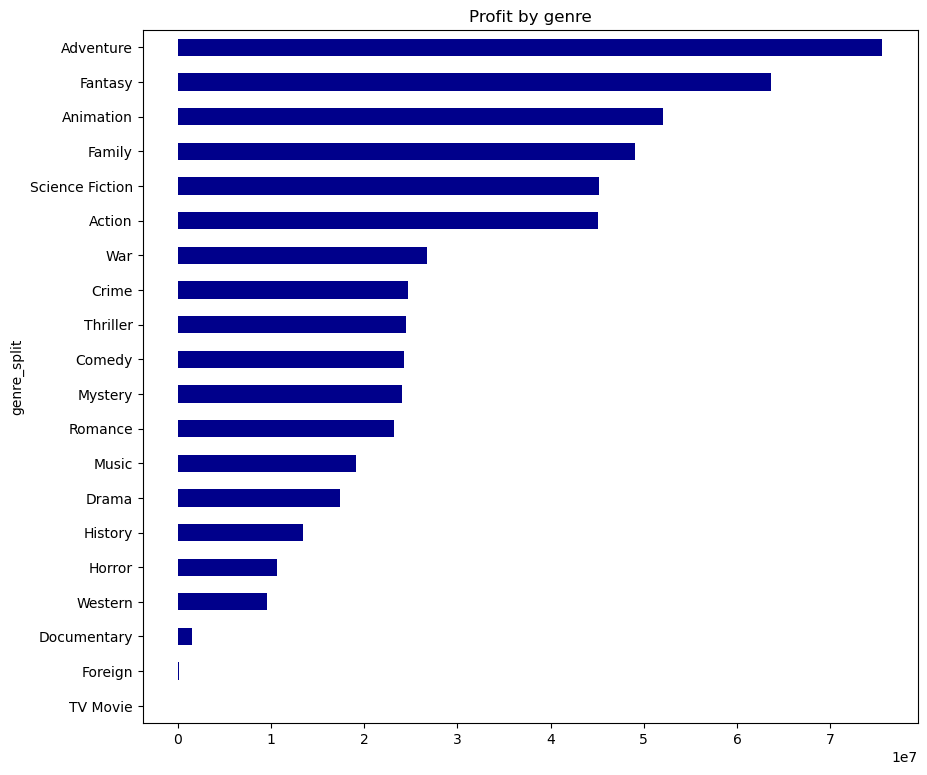

In [101]:
genres_average
genres_average.sort_values('profit',ascending=True,inplace=True)
genres_average['profit'].plot.barh(title='Profit by genre',color='DarkBlue',figsize=(10,9))

In [ ]:
#3.Which genre have high avg.popularity?

<Axes: title={'center': 'Popularity by genre'}, ylabel='genre_split'>

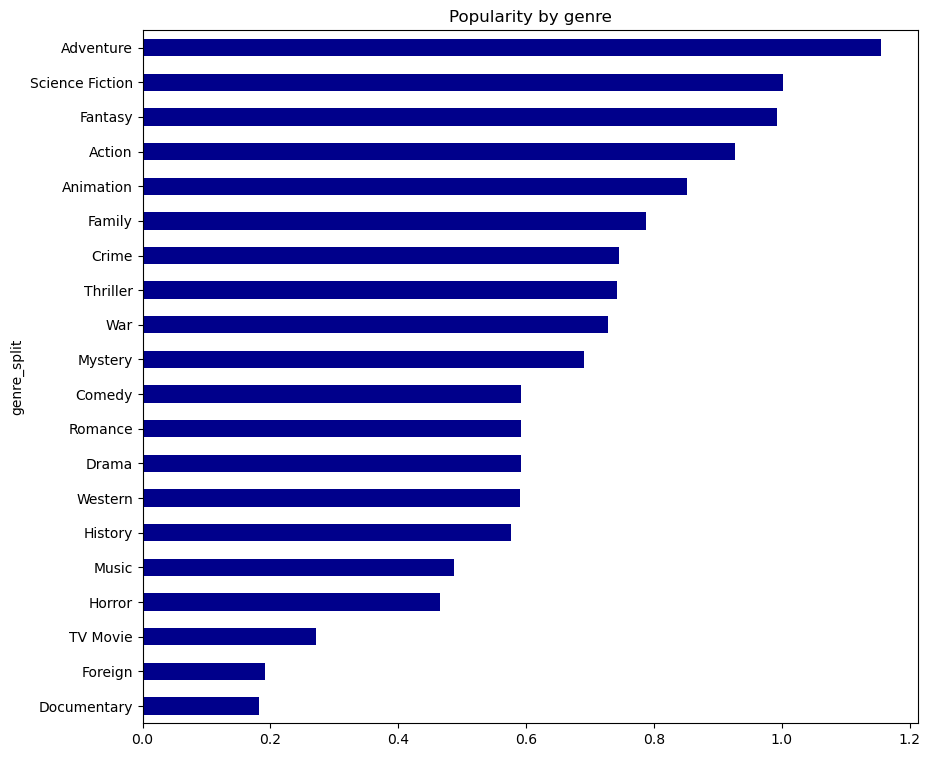

In [103]:
genres_average.sort_values('popularity',ascending=True,inplace=True)
genres_average['popularity'].plot.barh(title='Popularity by genre',color='DarkBlue',figsize=(10,9))

In [ ]:
#4.Which genre have highest number of movies with an voting avg >=8?

In [107]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genre_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action


In [111]:
vote_fifty =movies_genre[(movies_genre['vote_count']>=50) & (movies_genre['vote_average']>=8)]
vote_zero =movies_genre[movies_genre['vote_average']>=8]

In [113]:
genres_vote=pd.DataFrame(vote_fifty.groupby('genre_split').vote_average.nunique()).sort_values('vote_average',ascending=False)

In [115]:
genres_vote

,vote_average
genre_split,
Documentary,5
Drama,5
Crime,4
Action,2
History,2
Thriller,2
Romance,2
Music,2
War,2


In [ ]:
## Research Hypothesis
1.The best movies according to vote avg.return high profit and revenue.
2.The best movies according to popularity return high profit and revenue.
3.Highly budgeted movies return high revenue and profit.
4.Highly budgeted movies have a high popularity.

In [ ]:
movies.drop_duplicates(inplace=True)
movies['profit']=movies['revenue']-movies['budget']
movies_genre= movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]
movies_genre

In [ ]:
#1.The best movies according to vote avg.return high profit and revenue.